In [1191]:
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [1192]:
print("train: ",train.shape)
print("test: ",test_df.shape)
train.info()
test_df.info()

train:  (891, 12)
test:  (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  41

In [1193]:
#결측기 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1194]:
test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
Family      0
dtype: int64

In [1195]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set()

In [1196]:
###categorical feature의 분포보기
##Pie_chart
def chart(feature):
    f_ratio = train[feature].value_counts(sort=False)
    f_size = f_ratio.size
    f_idx = f_ratio.index
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(f_ratio,labels=f_idx,autopct='%1.1f%%')
    plt.title(feature+'\'s ratio in total')
    plt.show()
    
    for i, idx in enumerate(f_idx):
        plt.subplot(1,f_size+1,i+1,aspect='equal')
        plt.pie([survived[idx],dead[idx]],labels=['Survived','Dead'],autopct='%1.1f%%')
        plt.title(str(idx)+'\'s ratio')
        
    plt.show()

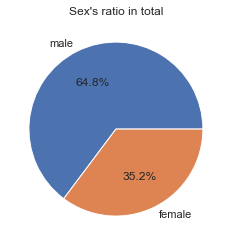

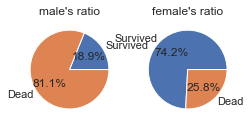

In [1197]:
chart('Sex')
##남성 비율이 여성 비율보다 높지만 생존 비율은 여성이 남성보가 4배 가량 높다

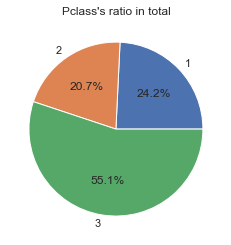

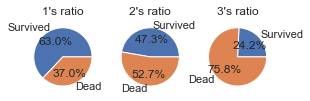

In [1198]:
chart('Pclass')
## 3등석비율이 가장 많지만 생존률은 1->2->3 순서이다.

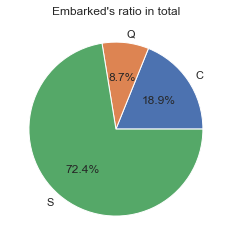

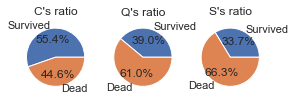

In [1199]:
chart('Embarked')
## 배를 탄곳
## S:Southampton C:Cherbourg Q:Queenstown
## S에서 탄 인원이 가장 많지만 사망률이 가장 높고, C의 생존률이 가장 높다.

In [1200]:
##Bar Chart
def Bar(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

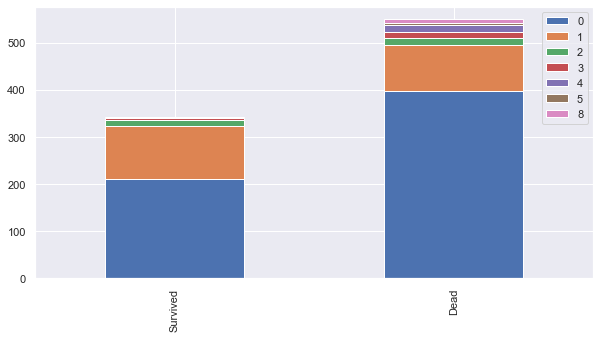

In [1201]:
##SibSp : 배우자나 형제 자매 수의 합
Bar("SibSp")
## 2명이상의 형제나 배우자와 함께 탄 경우 생존률이 컸음

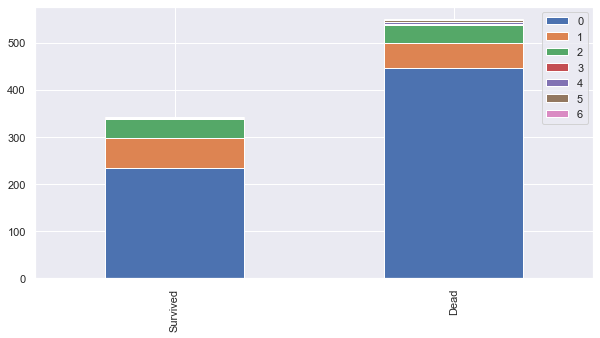

In [1202]:
##Parch : 부모나 자식 수의 합
Bar("Parch")
## SibSp와 유사하게 2명이상일때 생존률이 높음

In [1203]:
### 표를 이용해 분석해본 경우 여성이고, PClass가 높을 수록 Cherbourg 선착장에서 배를
##탔을 경우, 형제,자매,배우자,부모,자녀와 함께 배를 타면 생존률이 높아짐을 알 수 있다.
## 하지만 하나의 특성과 생존 비율만을 가지고 예측하기는 무리
## 인원수등 여러가지도 생각해야함

In [1204]:
##  data 전처리
train_test = [train,test_df]

In [1205]:
## 이름 feature, title에서 성별 나이대 결혼 유무를 알 수 있음
for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
    ##([A-Za-z]+). : 공백으로 시작하고 .으로 끝나는 문자열 추출시
    
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1211]:
pd.crosstab(test_df['Title'],test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [1190]:
## 적은 Title은 Other로 대체
for dataset in train_test:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady',
                                               'Major','Rev','Sir'],'Others')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [1119]:
## String data로 변형
## 성별은 male/female로 나눠져 있기때문에 string data로만 변형
for dataset in train_test:
    #dataset['Title'] = dataset['Title'].astype(str)
    #dataset['Sex'] = dataset['Sex'].astype(str)
    ## Embarked Feature에는 Nan 값이 존재 
    ## S가 가장 많으므로 S로 변경 -> string data로 변형
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    #dataset['Embarked'] = dataset['Embarked'].astype(str)

In [1120]:
for dataset in train_test:
     dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
     dataset['Age'] = dataset['Age'].astype(int)
     train['Age_Bound'] = pd.cut(train['Age'], 5)
print (train[['Age_Bound', 'Survived']].groupby(['Age_Bound'], as_index=False).mean())

       Age_Bound  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [1121]:
for dataset in train_test:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=26),'Age'] = 1
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=36),'Age'] = 2
    dataset.loc[(dataset['Age']>36)&(dataset['Age']<=62),'Age'] = 3
    dataset.loc[dataset['Age']>62,'Age'] = 4
    #dataset['Age'] = dataset['Age'].map({0:'Child',1:'Young',2:'Middle',3:'Senior',4:'Old'}).astype(str)

In [1122]:
print(train[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean())
print(test_df[test_df['Fare'].isnull()]['Pclass'])
## 3 class의 값이 nan

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550
152    3
Name: Pclass, dtype: int64


In [1123]:
## 3's의 평균을 넣어줌
for dataset in train_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.67550)

In [1124]:
#Fare도 역시 Scale
for dataset in train_test:
    dataset.loc[dataset['Fare']<=17,'Fare'] = 0
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare'] = 1
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare'] = 2
    dataset.loc[dataset['Fare']>100,'Fare'] = 3

In [1125]:
## SibSp & Parch 합치기
for dataset in train_test:
    dataset['Family'] = dataset['Parch']+dataset['SibSp']
    dataset['Family'] = dataset['Family'].astype(int)

In [1126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Title        891 non-null    object  
 13  Age_Bound    891 non-null    category
 14  Family       891 non-null    int32   
dtypes: category(1), float64(1), int32(2), int64(5), object(6)
memory usage: 91.7+ KB


In [1127]:
## 필요없는 feature drop 시키기
f_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(f_drop, axis=1)
test_df = test_df.drop(f_drop, axis=1)
train = train.drop(['PassengerId', 'Age_Bound'], axis=1)

In [1128]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    object 
 7   Family    891 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 48.9+ KB


In [1129]:
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 421 to 607
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  268 non-null    int64  
 1   Pclass    268 non-null    int64  
 2   Sex       268 non-null    int64  
 3   Age       268 non-null    int32  
 4   Fare      268 non-null    float64
 5   Embarked  268 non-null    int64  
 6   Title     268 non-null    int64  
 7   Family    268 non-null    int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 16.8 KB


In [1056]:
## one-hot encoding과 train data와 label을 분리시키는 작업
train = pd.get_dummies(train)
test_df = pd.get_dummies(test_df)

train_label = train['Survived']
train_data = train.drop('Survived',axis=1)

#test_data = test.drop('PassengerId',axis=1).copy()

In [1086]:
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int32  
 2   Fare          418 non-null    float64
 3   Family        418 non-null    int32  
 4   Sex_female    418 non-null    uint8  
 5   Sex_male      418 non-null    uint8  
 6   Embarked_C    418 non-null    uint8  
 7   Embarked_Q    418 non-null    uint8  
 8   Embarked_S    418 non-null    uint8  
 9   Title_Master  418 non-null    uint8  
 10  Title_Miss    418 non-null    uint8  
 11  Title_Mr      418 non-null    uint8  
 12  Title_Mrs     418 non-null    uint8  
 13  Title_Others  418 non-null    uint8  
dtypes: float64(1), int32(2), int64(1), uint8(10)
memory usage: 14.0 KB


In [1130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm

from sklearn.utils import shuffle

In [1131]:
#데이터 정렬 섞기
train_data,train_label = shuffle(train_data,train_label,random_state=5)

In [1132]:
## cross validation(K-fod) 교차 검증 진행
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K_fold = KFold(n_splits=10,shuffle=True,random_state=0) 
#10개의 fold로 나눈다

In [952]:
## KNN
clf = KNeighborsClassifier(n_neighbors=13) # 13개의 이웃을 기준으로 측정
scoring = "accuracy"
score = cross_val_score(clf,train_data,train_label,cv=K_fold,n_jobs=1,scoring=scoring)
print(score)
## KNN score
round(np.mean(score)*100,2)

[0.84444444 0.8988764  0.83146067 0.74157303 0.82022472 0.71910112
 0.79775281 0.87640449 0.79775281 0.82022472]


81.48

In [953]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf
scoring = 'accuracy'
score = cross_val_score(clf,train_data,train_label,cv=K_fold,n_jobs=1,scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.8        0.91011236 0.80898876 0.78651685 0.83146067 0.75280899
 0.74157303 0.84269663 0.75280899 0.82022472]


80.47

In [954]:
## RandomForest
clf = RandomForestClassifier(n_estimators=13) #13개의 decision tree
clf
scoring = 'accuracy'
score = cross_val_score(clf,train_data,train_label,cv=K_fold,n_jobs=1,scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.8        0.87640449 0.79775281 0.79775281 0.84269663 0.74157303
 0.7752809  0.82022472 0.79775281 0.83146067]


80.81

In [955]:
#Naive Bayes
clf = GaussianNB()
clf
scoring = 'accuracy'
score = cross_val_score(clf,train_data,train_label,cv=K_fold,n_jobs=1,scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.8        0.8988764  0.79775281 0.73033708 0.7752809  0.80898876
 0.78651685 0.83146067 0.76404494 0.75280899]


79.46

In [956]:
## SVM
clf = SVC(C=1,kernel='rbf',coef0=1)
clf
scoring = 'accuracy'
score = cross_val_score(clf,train_data,train_label,cv=K_fold,n_jobs=1,scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.84444444 0.92134831 0.84269663 0.7752809  0.80898876 0.82022472
 0.84269663 0.86516854 0.82022472 0.79775281]


83.39

In [957]:
# TESTING
# 가장 높은 SVM 사용

clf = SVC(C=1,kernel='rbf',coef0=1)
clf.fit(train_data,train_label) #학습시킬 데이터, 예측해야하는 class

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1145]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Title        418 non-null    object 
 7   Family       418 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 23.0+ KB


In [1144]:
test_data = test_df.drop("PassengerId",axis=1).copy()
pred = clf.predict(test_data)

#testing data 역시 passengerID 필요없다. 따라서 DROP
#예측 진행하고 예측 결과물을 pred에 저장

ValueError: could not convert string to float: 'Master'

In [1146]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)
train['Title'].replace(['Mr','Mrs','Miss','Master','Others'],[0,1,2,3,4],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)
test_df['Title'].replace(['Mr','Mrs','Miss','Master','Others'],[0,1,2,3,4],inplace=True)

In [1147]:
train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

In [1055]:
print(test_X)

     Pclass  Sex  Age  Fare  Embarked  Title  Family
421       3    0    1   0.0         1      0       0
618       2    1    0   2.0         0      2       3
116       3    0    4   0.0         1      0       0
310       1    1    1   2.0         2      2       0
57        3    0    2   0.0         2      0       0
..      ...  ...  ...   ...       ...    ...     ...
653       3    1    2   0.0         1      2       0
500       3    0    1   0.0         0      0       0
512       1    0    2   1.0         0      0       0
758       3    0    2   0.0         0      0       0
607       1    0    2   2.0         0      0       0

[268 rows x 7 columns]


# Ensembling

#Voting Classifier

In [1091]:

# 많은 다른 머신러닝 모델로 부터 predicion을 합치는 가장 간단한 방법이며 이것은
# submodel의 prediction에 근거한 prediction 결과의 평균을 낸다

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                               ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                               ('LR',LogisticRegression(C=0.05)),
                                               ('DT',DecisionTreeClassifier(random_state=0)),
                                               ('NB',GaussianNB()),
                                               ('svm',svm.SVC(kernel='linear',probability=True))],
                                   voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is : ',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring="accuracy")
print("The cross validation score is ",cross.mean())



C:\Users\yun\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for ensembled model is :  0.8470149253731343
The cross validation score is  0.8234511008704557


# Bagging

In [1036]:
##Bagged KNN

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3,),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
pred = model.predict(test_X)
print("The accuracy for bagged KNN is : ",metrics.accuracy_score(pred,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is : ',result.mean())

C:\Users\yun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for bagged KNN is :  0.8059701492537313
The cross validated score for bagged KNN is :  0.809062980030722


In [1037]:
#Bagged DecisionTree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
pred = model.predict(test_X)
print('The accuracy for bagged Decision Tree is : ',metrics.accuracy_score(pred,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is : ',result.mean())

C:\Users\yun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for bagged Decision Tree is :  0.8134328358208955
The cross validated score for bagged Decision Tree is :  0.8058115719406042


# Boosting

In [1038]:
#AdaBoost(Adaptive Boosting)

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is : ',result.mean())

The cross validated score for AdaBoost is :  0.8217869943676396


In [1093]:
## XGBoost

import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validation score for XGBoost is : ',result.mean())

The cross validation score for XGBoost is :  0.8090629800307217


In [1094]:
## voting 가 가장 좋은 accuracy  
from sklearn.model_selection import GridSearchCV
n_estimators = list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 18.9min finished


0.8250322580645161
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=300, random_state=None)


In [1095]:
#GCV = GridSErchCV()
gd.fit(train_X,train_Y)
gd.best_params_
gd.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8250322580645161

In [1148]:
test_df.info()
test_data = test_df.drop("PassengerId",axis=1).copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   Family       418 non-null    int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 23.0 KB


In [1154]:
model = gd.best_estimator_
pred = model.predict(test_data)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int32  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Title     418 non-null    int64  
 6   Family    418 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 19.7 KB


In [1155]:
## 저장
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": pred
})
submission.to_csv('submission.csv',index=False)

78.68

In [332]:
def train_model(model):
    model.fit(train_data,train_label)
    pred = model.predict(test_data)
    accuracy = round(model.score(train_data,train_label)*100,2)
    print('Accuracy: ',accuracy,"%")
    return pred

In [333]:
#Logistic Regression
log_pred = train_model(LogisticRegression())
#SVM
svm_pred = train_model(SVC())
#kNN
knn_pre = train_model(KNeighborsClassifier(n_neighbors=4))
#Random Forest
rforest_pred = train_model(RandomForestClassifier(n_estimators=100))
#Navie Bayes
navieB = train_model(GaussianNB())

Accuracy:  82.83 %
Accuracy:  83.61 %
Accuracy:  83.84 %
Accuracy:  88.55 %
Accuracy:  79.24 %


In [334]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":rforest_pred
})
submission.to_csv("submission.csv",index=False)